In [1]:
!pip install shap

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547.9/547.9 kB 11.4 MB/s eta 0:00:00


In [2]:
import shap
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
!pip install gdown

In [4]:
'''
https://drive.google.com/file/d/1x_D1Feh88EFHQ63SEe55sAymUnztqzeK/view?usp=drivesdk
https://drive.google.com/file/d/1Kqf7-0Jkp1doGJWyhgxW1ku738IO4xji/view?usp=drivesdk
'''

'\nhttps://drive.google.com/file/d/1x_D1Feh88EFHQ63SEe55sAymUnztqzeK/view?usp=drivesdk\nhttps://drive.google.com/file/d/1Kqf7-0Jkp1doGJWyhgxW1ku738IO4xji/view?usp=drivesdk\n'

In [5]:
!gdown 1x_D1Feh88EFHQ63SEe55sAymUnztqzeK
!gdown 1Kqf7-0Jkp1doGJWyhgxW1ku738IO4xji

Downloading...
From: https://drive.google.com/uc?id=1x_D1Feh88EFHQ63SEe55sAymUnztqzeK
To: /content/train.pkl
100% 3.59M/3.59M [00:00<00:00, 207MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Kqf7-0Jkp1doGJWyhgxW1ku738IO4xji
To: /content/test.pkl
100% 762k/762k [00:00<00:00, 116MB/s]


In [6]:
FILE_PATH = "train.pkl"

with open(FILE_PATH, 'rb') as f:
    df_train = pickle.load(f)

In [7]:
FILE_PATH = "test.pkl"

with open(FILE_PATH, 'rb') as f:
    df_test = pickle.load(f)

In [8]:
df_train.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

In [9]:
df_train.head()

tweet  label  \
0  1996   Ÿäÿß ŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿßŸÜÿ™ ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ŸÖÿπ ÿßŸä ÿßÿ≠ÿØ ...      1   
1  ÿ≠ŸÑÿ® ÿπŸÅÿ±ŸäŸÜ  ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÖŸÜ ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ...      3   
2             ÿßŸÜÿß ŸÜŸÅÿ≥Ÿä ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿ≠ÿØ ÿßŸÇÿ±ÿ® : )      3   
3  ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸàŸÜÿ≠ŸÜ ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ...      3   
4  57   ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸä...      0   

                               tweet_with_out_emojis  \
0  1996   Ÿäÿß ŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿßŸÜÿ™ ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ŸÖÿπ ÿßŸä ÿßÿ≠ÿØ ...   
1  ÿ≠ŸÑÿ® ÿπŸÅÿ±ŸäŸÜ  ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÖŸÜ ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ...   
2             ÿßŸÜÿß ŸÜŸÅÿ≥Ÿä ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿ≠ÿØ ÿßŸÇÿ±ÿ® : )   
3  ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸàŸÜÿ≠ŸÜ ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ...   
4  57   ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸä...   

                                        cleaned_data  \
0  ŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ÿßŸä ÿßÿ≠ÿØ        ŸÖÿ™ÿßŸÉÿØ ÿßÿ®Ÿà ...   
1  ÿ≠ŸÑÿ® ÿπŸÅÿ±ŸäŸÜ ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ÿ±ŸäŸÅ ...   
2                           ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿßŸÇÿ±ÿ®     
3  ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ÿßŸÑÿßŸàŸÑ...   
4  ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ...   

                                       Root Stemming  \
0            ŸáŸÜÿØ ÿ≠ÿ®ÿ® ÿ™ÿØÿ± ŸÑÿ®ÿ¥ ÿßŸä ÿßÿ≠ÿØ ÿ™ŸÉÿØ ÿßÿ®Ÿà ÿ¨ÿ≥ŸÖ ÿßŸäÿØÿ±   
1  ÿ≠ŸÑÿ® ÿπŸÅÿ± ÿπŸÇŸÑ ÿπÿ¥ÿ± ÿ¥ÿ®ÿ® ŸÇÿ±Ÿá ÿ®ÿ≥ÿ∑ ÿ±ŸäŸÅ ÿπŸÅÿ± ŸÇŸàÿ™ Ÿáÿ±ÿ® ÿπÿ¥...   
2                                ŸÖÿ±Ÿá ÿ¨ÿ±ÿ® ÿßŸÉŸÜ ŸÑŸäŸÉ ŸÇÿ±ÿ®   
3      ÿµÿ±ÿ≠ ÿ≠ÿ≥ÿ≥ ÿÆÿ≤Ÿä ŸÉÿ™ŸÅ ŸÖÿ´ŸÑ ÿ¥ÿ±ŸÅ ÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿπŸàÿ≤ ÿµÿ≠Ÿá ÿ±Ÿäÿ∂   
4  ÿπÿ¨ŸÑ Ÿäÿ∑ŸÑ ÿßÿ®Ÿà ÿ®ÿ≥ŸÑ ŸäŸÅÿ≤ ÿØŸáÿ® ÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿ¨ŸàÿØŸà ÿ®ÿ∑ŸÑ ÿπŸÑŸÖ...   

                                      Light Stemming  
0  ŸÖŸáŸÜÿØ Ÿäÿßÿ≠ÿ®Ÿäÿ®Ÿä ÿ™ÿØŸàÿ± ŸÑÿ®ÿ¥ ÿßŸä ÿßÿ≠ÿØ ŸÖÿ™ÿßŸÉÿØ ÿßÿ®Ÿà ÿ¨ÿßÿ≥ŸÖ ŸÖÿß...  
1  ÿ≠ŸÑÿ® ÿπŸÅÿ± ÿßÿπÿ™ŸÇÿßŸÑ ÿπÿ¥ÿ± ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÇÿ±ŸäŸá ÿ®ÿßÿ≥Ÿàÿ∑Ÿá ÿ±ŸäŸÅ ÿπŸÅÿ± ...  
2                             ŸÖÿ±Ÿá ÿßÿ¨ÿ±ÿ® ÿßŸÉŸàŸÜ ŸÑŸäŸÉ ÿßŸÇÿ±ÿ®  
3  ÿßŸÑÿµÿ±ÿßÿ≠Ÿá ÿßÿ≠ÿ≥ÿßÿ≥ ŸÖÿÆÿ≤Ÿä ŸÜŸÉÿ™ŸÅŸä ÿ®ÿßŸÑÿ™ŸÖÿ´ŸäŸÑ ÿßŸÑŸÖÿ¥ÿ±ŸÅ ÿßŸÑÿßŸàŸÑ...  
4  ÿπÿßÿ¨ŸÑ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸä ŸÅÿßÿ®ŸäŸà ÿ®ÿßÿ≥ŸÑ ŸäŸÅŸàÿ≤ ÿ®ÿØŸáÿ® ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ...

In [10]:
label_to_class = [
    'none',
    'anger',
    'joy',
    'sadness',
    'love',
    'sympathy',
    'surprise',
    'fear'
]
label_to_class_dic = {
    0:'none',
    1:'anger',
    2:'joy',
    3:'sadness',
    4:'love',
    5:'sympathy',
    6:'surprise',
    7:'fear'
}

In [11]:
def map_label_to_class(indices, classes):
  return [classes[idx] for idx in indices]

In [12]:
def create_confusion_matrix(y_pred):
  # creatin a confusion matrix
  y_true = map_label_to_class(df_test['label'], label_to_class)
  y_pred = map_label_to_class(y_pred, label_to_class)
  cm = confusion_matrix(y_true, y_pred, labels=label_to_class)
  # create a DataFrame for the confusion matrix with class names as index and columns
  cm_df = pd.DataFrame(cm, index=label_to_class, columns=label_to_class)

  # create a heatmap for visualization
  plt.figure(figsize=(5, 5))
  sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

## Naive Bayes Model

In [13]:
# use Tfidf Vectorizer root stemming
tfidf_vectorizer_rs = TfidfVectorizer()
# fit and transform the training data
X_train_tfidf_rs = tfidf_vectorizer_rs.fit_transform(df_train['Root Stemming'])
# transform the test data using the same vectorizer
X_test_tfidf_rs = tfidf_vectorizer_rs.transform(df_test['Root Stemming'])

# use Tfidf Vectorizer light stemming
tfidf_vectorizer_ls = TfidfVectorizer()
# fit and transform the training data
X_train_tfidf_ls = tfidf_vectorizer_ls.fit_transform(df_train['Light Stemming'])
# transform the test data using the same vectorizer
X_test_tfidf_ls = tfidf_vectorizer_ls.transform(df_test['Light Stemming'])

## Using MultinomialNB

In [14]:
nb_vec = MultinomialNB(force_alpha=True, alpha=0.1, fit_prior=True)
nb_vec.fit(X_train_tfidf_rs, df_train['label'])

# test accuracy of tf-idf vectorizer
y_pred = nb_vec.predict(X_test_tfidf_rs.toarray())
# calculating the accuracy of the classifier
accuracy = accuracy_score(df_test['label'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.604635761589404


In [15]:
print(classification_report(df_test['label'], y_pred, target_names = label_to_class))

              precision    recall  f1-score   support

        none       0.54      0.78      0.64       229
       anger       0.57      0.69      0.62       200
         joy       0.50      0.39      0.44       205
     sadness       0.48      0.38      0.43       185
        love       0.69      0.72      0.70       193
    sympathy       0.73      0.75      0.74       156
    surprise       0.50      0.25      0.34       154
        fear       0.80      0.81      0.80       188

    accuracy                           0.60      1510
   macro avg       0.60      0.60      0.59      1510
weighted avg       0.60      0.60      0.59      1510



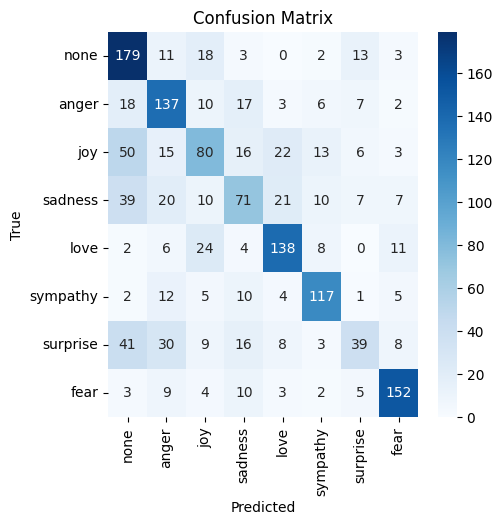

In [16]:
# creatin a confusion matrix
create_confusion_matrix(y_pred)

In [17]:
nb_vec = MultinomialNB(force_alpha=True, alpha=0.1, fit_prior=True)
nb_vec.fit(X_train_tfidf_ls, df_train['label'])

# test accuracy of tf-idf vectorizer
y_pred = nb_vec.predict(X_test_tfidf_ls.toarray())
# calculating the accuracy of the classifier
accuracy = accuracy_score(df_test['label'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.609271523178808


In [18]:
print(classification_report(df_test['label'], y_pred, target_names = label_to_class))

              precision    recall  f1-score   support

        none       0.50      0.81      0.62       229
       anger       0.62      0.62      0.62       200
         joy       0.52      0.39      0.44       205
     sadness       0.49      0.31      0.38       185
        love       0.65      0.74      0.69       193
    sympathy       0.81      0.79      0.80       156
    surprise       0.55      0.30      0.39       154
        fear       0.74      0.87      0.80       188

    accuracy                           0.61      1510
   macro avg       0.61      0.60      0.59      1510
weighted avg       0.61      0.61      0.59      1510



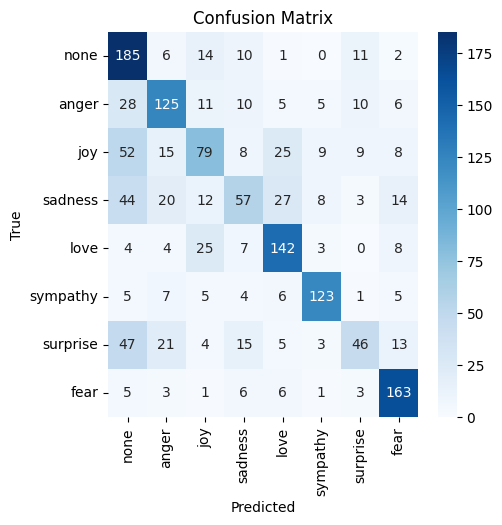

In [19]:
# creatin a confusion matrix
create_confusion_matrix(y_pred)

## Shap

In [20]:
'''
function that vectorizes the input data
then predicts using naive bayes model
parameters
texts: original text after preprocessing
'''
def model_predict(text):
  vec = tfidf_vectorizer_ls.transform(text)
  return nb_vec.predict_proba(vec)

In [21]:
'''
function that initializes shap with the appropriate model
parameters
model: an instance of your model, ex: LogisticRegression instance
'''
def initializeShap(model):
  # split input text into tokens
  masker = shap.maskers.Text(tokenizer=r"\W+")
  if isinstance(model, LogisticRegression):
    explainer = shap.Explainer(model_predict, masker=masker, output_names=label_to_class)
  elif isinstance(model, MultinomialNB):
    explainer = shap.Explainer(model_predict, masker=masker, output_names=label_to_class)
  else: print("Please use a valid model !")
  return explainer

In [22]:
nb_explainer = initializeShap(model=nb_vec)

In [23]:
def explain_example_shap(i):
  instance = df_test["Light Stemming"].iloc[i:i+1].values.astype(str).tolist()
  shap_values = nb_explainer(instance)
  shap.text_plot(shap_values)

In [24]:
y_true = df_test['label']

In [25]:
# get correctly and incorrectly classified examples
correctly_classified, incorrectly_classified = [], []
for i in range(len(y_true)):
  if y_pred[i] == y_true[i]:  correctly_classified.append(i)
  else: incorrectly_classified.append(i)

## find specific words

### loop through all incorrectly classifies examples and exctract the most common words that led to the wrong classfication

In [26]:
def get_word_frequency(df):
  # creating a dictionary to hold the number of times a specific word occurs
  word_frequency = {}
  for idx in incorrectly_classified:
    # tokenizing the words
    words_to_add = word_tokenize(df.iloc[idx])
    # looping through each word in list
    for word in words_to_add:
      if word in word_frequency:
        word_frequency[word] += 1
      else: word_frequency[word] = 1
  # soring the dictionary from most common words to least common
  sorted_list = sorted(word_frequency.items(), key=lambda word: word[1], reverse=True)
  return sorted_list

In [27]:
word_freq = get_word_frequency(df_test["cleaned_data"])

In [28]:
# getting 10 most common words
print(word_freq[:10])

[('ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ', 181), ('ŸÅÿ±ÿ≠', 78), ('ÿßŸÑŸÑŸä', 64), ('ŸÑÿß', 52), ('ŸÖÿ¥', 50), ('ŸÖÿµÿ±', 41), ('ÿßŸÑŸÑŸá', 41), ('ÿ≠ÿ®', 40), ('ÿ≠ÿßÿ¨Ÿá', 33), ('ÿ≠ÿ≤ŸÜ', 33)]


### as we can see above are the most common words that lead to missclassification, lets try to understand why?

In [29]:
# see how the words above influence the classes
def word_occurance(word, df, y_pred):
  label_dic = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
  for idx in incorrectly_classified:
    if word in df.iloc[idx]:
      label_dic[y_pred[idx]] += 1
  # create a new dictionary using label_to_class as keys
  new_dict = {label: label_dic.get(index, 0) for index, label in enumerate(label_to_class)}
  return new_dict

In [30]:
problamatic_words = [word[0] for word in word_freq[:10]]
print(problamatic_words)

['ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ', 'ŸÅÿ±ÿ≠', 'ÿßŸÑŸÑŸä', 'ŸÑÿß', 'ŸÖÿ¥', 'ŸÖÿµÿ±', 'ÿßŸÑŸÑŸá', 'ÿ≠ÿ®', 'ÿ≠ÿßÿ¨Ÿá', 'ÿ≠ÿ≤ŸÜ']


In [31]:
for word in problamatic_words:
  dic = word_occurance(word, df_test["cleaned_data"], y_pred)
  print(f"Classes for Word {word}:\n{dic}", end="\n\n")

Classes for Word ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ:
{'none': 123, 'anger': 10, 'joy': 14, 'sadness': 10, 'love': 0, 'sympathy': 0, 'surprise': 16, 'fear': 6}

Classes for Word ŸÅÿ±ÿ≠:
{'none': 28, 'anger': 5, 'joy': 6, 'sadness': 2, 'love': 2, 'sympathy': 0, 'surprise': 3, 'fear': 6}

Classes for Word ÿßŸÑŸÑŸä:
{'none': 35, 'anger': 4, 'joy': 5, 'sadness': 3, 'love': 2, 'sympathy': 0, 'surprise': 6, 'fear': 6}

Classes for Word ŸÑÿß:
{'none': 151, 'anger': 47, 'joy': 41, 'sadness': 30, 'love': 34, 'sympathy': 18, 'surprise': 23, 'fear': 25}

Classes for Word ŸÖÿ¥:
{'none': 37, 'anger': 11, 'joy': 12, 'sadness': 7, 'love': 6, 'sympathy': 2, 'surprise': 11, 'fear': 6}

Classes for Word ŸÖÿµÿ±:
{'none': 42, 'anger': 4, 'joy': 6, 'sadness': 3, 'love': 0, 'sympathy': 0, 'surprise': 2, 'fear': 1}

Classes for Word ÿßŸÑŸÑŸá:
{'none': 10, 'anger': 6, 'joy': 17, 'sadness': 2, 'love': 7, 'sympathy': 8, 'surprise': 2, 'fear': 8}

Classes for Word ÿ≠ÿ®:
{'none': 9, 'anger': 6, 'joy': 13, 'sadness': 7, 'love'

## Misunderstanding of context

In [32]:
def explain_example_shap(i, class_to_explain):
  instance = df_test["Light Stemming"].iloc[i:i+1].values.astype(str).tolist()
  print(df_test["tweet"].iloc[i])
  shap_values = nb_explainer(instance)
  # shap.text_plot(shap_values)
  # waterfall plot
  shap.plots.waterfall(shap_values[0][:, class_to_explain])

In [33]:
def explain_example(idx):
  print(f"True Label {label_to_class_dic[y_true[idx]]} - Predicted Label {label_to_class_dic[y_pred[idx]]}")
  print(f"Explaining according to label {label_to_class_dic[y_pred[idx]]}")
  explain_example_shap(idx, y_pred[idx])

True Label fear - Predicted Label none
Explaining according to label none
ÿ∑ÿ® ŸáŸÜÿπŸäÿ¥ ÿßÿ≤ÿßŸä ŸÖŸÜ ÿ∫Ÿäÿ± ÿ±ŸÅÿπ ÿßÿ´ŸÇÿßŸÑ ŸÖŸÜ ŸáŸÜÿß ŸÑÿ≠ÿØ ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿßŸÑÿ¨ÿßŸäŸá ÿ®ÿπÿØ 4 ÿ≥ŸÜŸäŸÜ...ÿüÿü


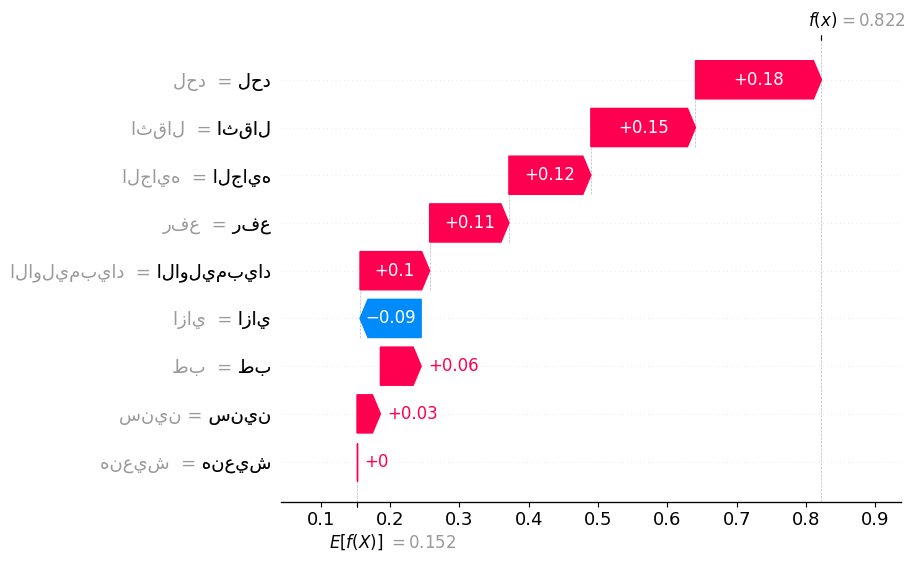

In [34]:
explain_example(incorrectly_classified[0])

about the previous example, true label is fear and it's predicted as none, however the true emotion is somewhat ambigouse

True Label anger - Predicted Label joy
Explaining according to label joy
tv ÿπŸÑŸä ÿπÿ®ÿØÿßŸÑŸÑŸá ÿµÿßŸÑÿ≠ ÿµÿßŸÜÿπ ÿßŸÑŸàÿ≠ÿØŸá ŸÑÿß ÿ™ŸÜÿ≥ÿßÿ° Ÿáÿ∞ÿß Ÿàÿßÿ∞ŸÉÿ±ŸÉ ÿßŸÜ ÿßÿ≤ÿπŸäŸÖ ŸÑŸÜ ŸäŸÅÿ±ÿ∑ ŸÅŸä ÿßŸÑŸàÿ≠ÿØŸá ŸÑŸà ŸÉŸÑŸÅÿ™Ÿá ÿ≠Ÿäÿßÿ™Ÿá. ÿÆŸÑŸäŸáÿßÿ° ŸÅŸä ÿ±ÿßÿ≥ŸÉ ŸÖÿ≥ŸÖÿßÿ± ŸÖÿ≥ŸÖŸÖ


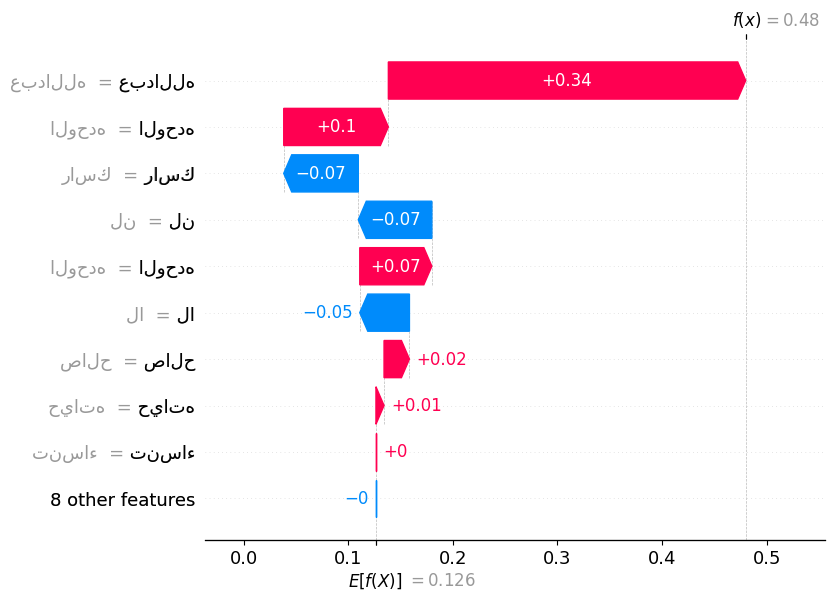

In [35]:
explain_example(incorrectly_classified[1])

here it's labeled as anger and predicted as joy
however like the example before, it's hard to label that example.

True Label joy - Predicted Label none
Explaining according to label none
ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿßŸÑÿ≥ŸÜŸá ÿØŸä ÿßŸÅÿ¥ÿÆ ŸÖŸÜ ÿ≥ŸäÿØŸÜŸä ÿßŸÑŸÑŸä ŸÉŸÜÿß ÿ®ŸÜÿ≤Ÿàÿ∫ ŸÖŸÜ ÿßŸÑŸÖÿØÿ±ÿ≥Ÿá ÿπŸÑÿ¥ÿßŸÜ ŸÜÿ™ŸÅÿ±ÿ¨ ÿπŸÑŸäŸáÿß üòÄ


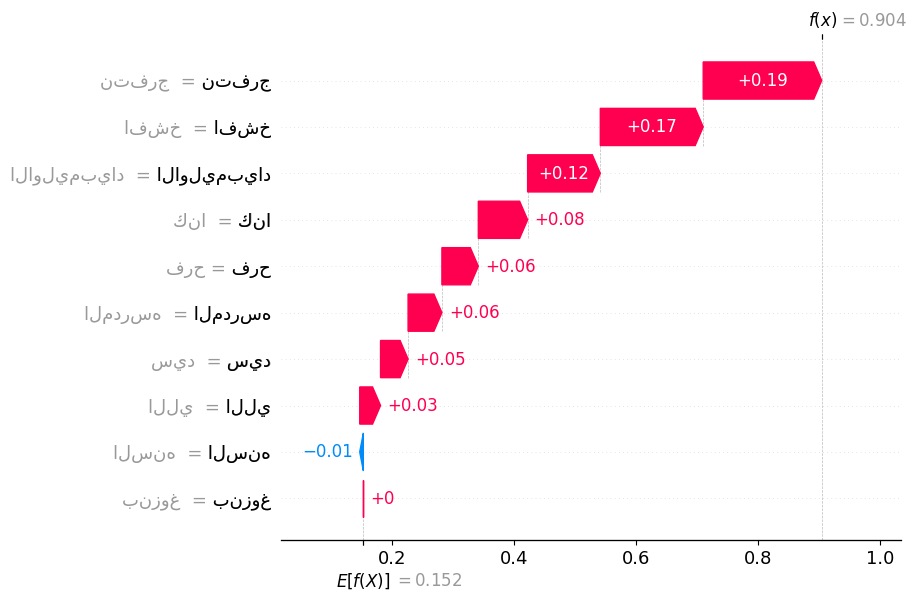

In [36]:
explain_example(incorrectly_classified[2])

here there's a clear missunderstanding of the context, the word "ŸÜÿ™ŸÅÿ±ÿ¨" leads to a high score for none prediction, and the word "ÿßŸÅÿ¥ÿÆ" which in this context clearly shows emotions of joy, leads to a none prediction which doesn't make sense.

True Label fear - Predicted Label anger
Explaining according to label anger
ÿßÿπÿ™ŸÇÿßŸÑ ŸÖÿ∫ÿ±ÿ®Ÿä ŸÇÿ™ŸÑ ÿßÿ≥ÿ®ÿßŸÜŸäÿß ÿ®ÿ¥ŸÉŸÑ ŸÖÿ±Ÿàÿπ | ŸÖÿßÿ∞ÿß ÿ¨ÿ±Ÿä


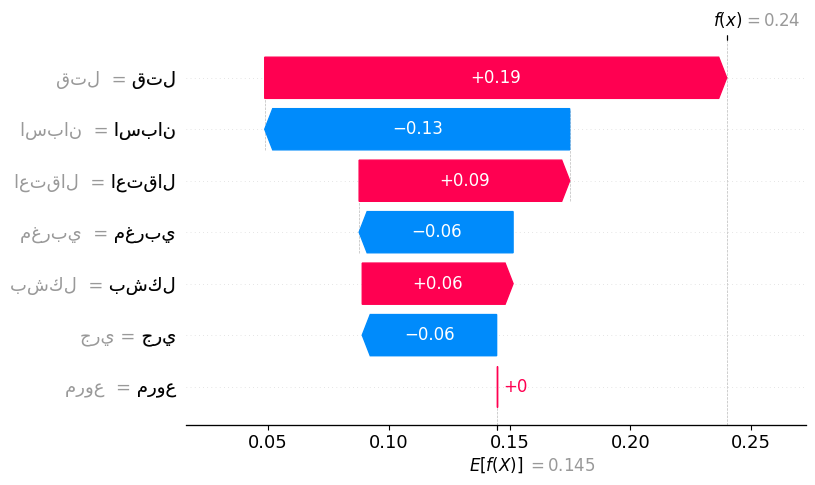

In [37]:
explain_example(incorrectly_classified[3])

here the label is fear, predicted is anger, but there are alot of mixed feelings like surprise, sadness and fear, which make it hard to pick one, however anger is clearly not the correct prediction.

True Label sadness - Predicted Label none
Explaining according to label none
ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ ÿØÿßÿÆŸÑŸäŸÜ ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿ™ŸÖÿ´ŸäŸÑ ŸÖÿ¥ÿ±ŸÅ


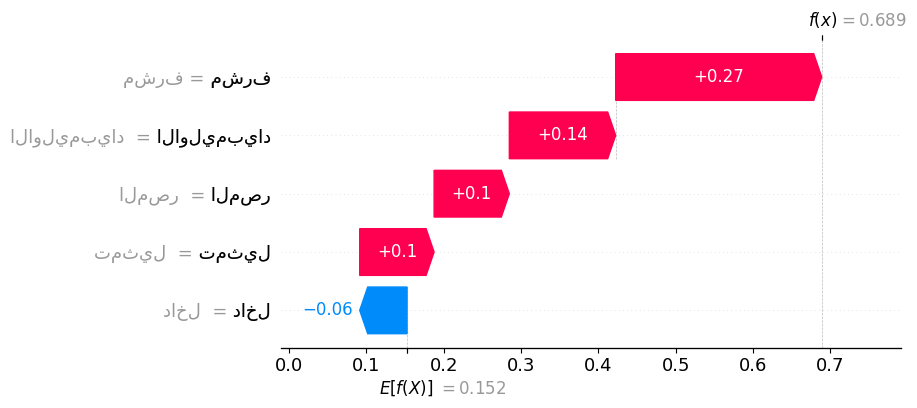

In [38]:
explain_example(incorrectly_classified[4])

here the model predicted none but the true label is sadness, which doesn't make sense, this tweet shows pride, which maybe can lead to joy? however none is an understandable prediction because it doesn't show any one of the these emotions strongly.

True Label anger - Predicted Label none
Explaining according to label none
ŸàÿØŸá ÿ≥ÿ§ÿßŸÑ ÿßŸÑŸÑŸä ÿπÿßŸäÿ¥ ŸÅŸä ŸÖÿµÿ±  ŸÉŸÑ ŸäŸàŸÖ ÿÆÿßÿ≤ŸàŸÇ ÿßÿµŸÑÿß


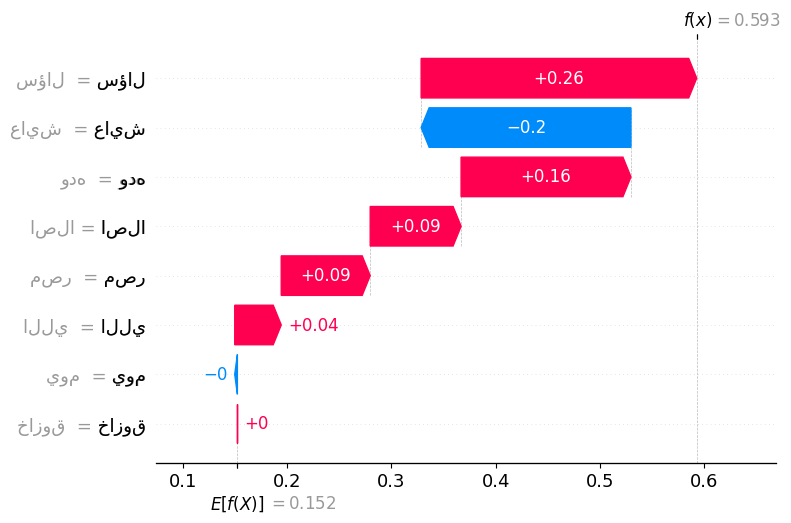

In [39]:
explain_example(incorrectly_classified[16])

here the model didn't understand the word "ÿÆÿßÿ≤ŸàŸÇ" which is the only word in the sentence that lead to the anger prediction.

True Label joy - Predicted Label none
Explaining according to label none
ÿ≠ÿ≥ŸÜÿßŸã ŸÖŸÜ ÿßŸÑŸàÿßÿ∂ÿ≠ ÿßŸÜŸÜÿß ÿ≥ŸÜÿ™ÿßÿ®ÿπ ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ . ü§îüòÑ


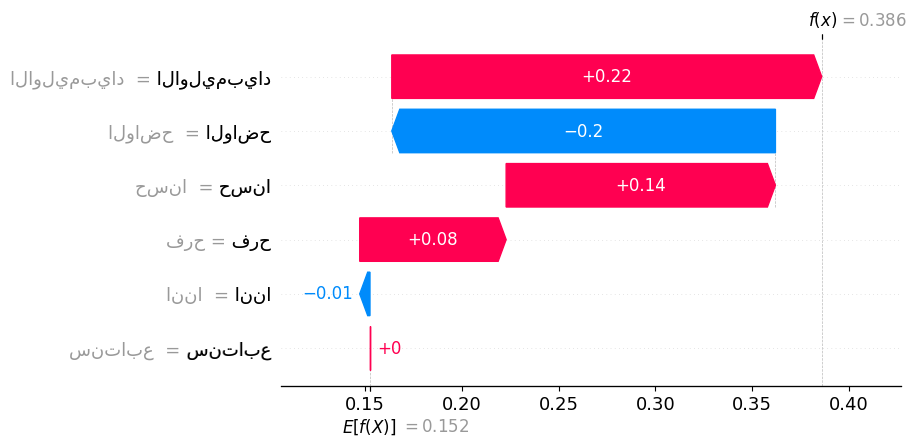

In [40]:
explain_example(incorrectly_classified[19])

maybe the emojis lead to that label? because without the emojis it makes sense to be none.

#### from the above examples, it's pretty obvious that there are problems with the labeling of the examples.

#### even sometimes the model predicts the class that makes the most sense but that prediction is differenct from the 'true label' which doesn't make much sense.

#### if the model trained on poorly classified labels like this, then we predict that correcting the labels should result on better performance.

## Clearly wrong labels

True Label fear - Predicted Label surprise
Explaining according to label surprise
: ŸÖŸèÿ¥ ŸÖÿπŸÇŸàŸÑ ÿßŸÜÿß ÿßŸäÿØŸä ŸÑÿßŸÖÿ≥Ÿá ÿßŸäÿØŸäŸÉ .. ÿÆÿßŸäŸÅ ÿßŸÉŸàŸÜ Ÿäÿß ÿ≠ÿ®Ÿäÿ®Ÿä ÿ®ÿ≠ŸÑŸÖ ÿ®ŸäŸÉ.


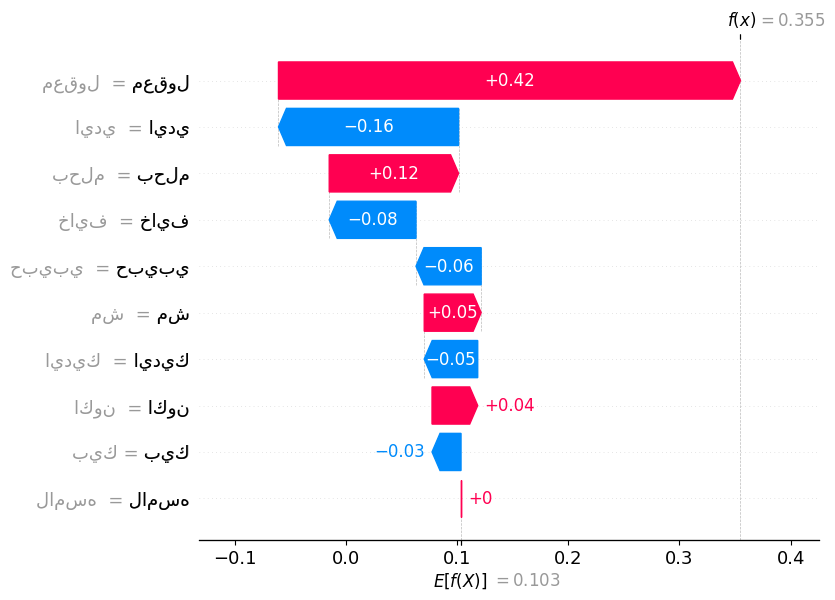

In [41]:
explain_example(incorrectly_classified[5])

True Label none - Predicted Label joy
Explaining according to label joy
ÿØŸàŸÑ ÿßŸÅÿ±ŸäŸÅŸäÿß ŸÖÿ®Ÿàÿ≤Ÿá ÿ≥ŸÖÿπÿ™ŸÜÿß ŸÅŸä ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ


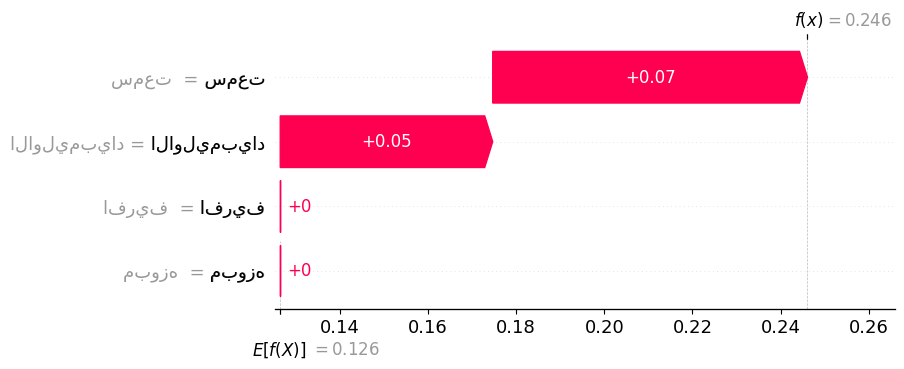

In [42]:
explain_example(incorrectly_classified[22])

above true label is fear, predicted is surprise.
from that statement it's obvious that it's not fear, and surprise makes more sense.

## Different dialacts

True Label joy - Predicted Label none
Explaining according to label none
ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿßŸÑÿ≥ŸÜŸá ÿØŸä ÿßŸÅÿ¥ÿÆ ŸÖŸÜ ÿ≥ŸäÿØŸÜŸä ÿßŸÑŸÑŸä ŸÉŸÜÿß ÿ®ŸÜÿ≤Ÿàÿ∫ ŸÖŸÜ ÿßŸÑŸÖÿØÿ±ÿ≥Ÿá ÿπŸÑÿ¥ÿßŸÜ ŸÜÿ™ŸÅÿ±ÿ¨ ÿπŸÑŸäŸáÿß üòÄ


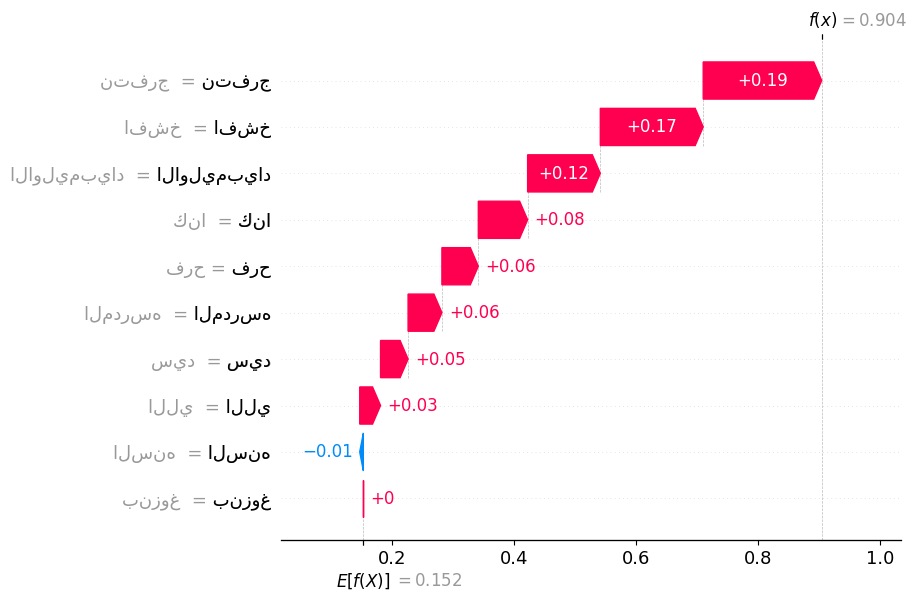

In [43]:
explain_example(incorrectly_classified[2])

True Label fear - Predicted Label anger
Explaining according to label anger
ÿßÿπÿ™ŸÇÿßŸÑ ŸÖÿ∫ÿ±ÿ®Ÿä ŸÇÿ™ŸÑ ÿßÿ≥ÿ®ÿßŸÜŸäÿß ÿ®ÿ¥ŸÉŸÑ ŸÖÿ±Ÿàÿπ | ŸÖÿßÿ∞ÿß ÿ¨ÿ±Ÿä


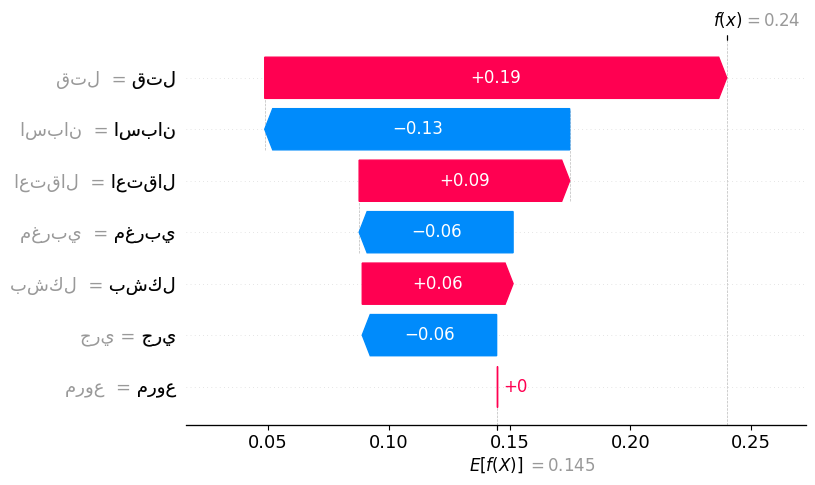

In [44]:
explain_example(incorrectly_classified[3])

True Label sadness - Predicted Label joy
Explaining according to label joy
ŸÖŸÜŸä ŸÑÿßÿ™ŸÇŸàŸÑ ÿßŸÑÿ≠ÿ∑ŸÄÿ® ÿ∑ŸÄÿßÿ≠ ÿπÿßÿ™ÿ® ÿπŸÑŸä ŸÉŸäŸÅŸÉ Ÿàÿ±ŸäŸÄÿ≠ ÿ∂ŸÖŸäŸÄÿ±ŸÉ  ÿßÿÆÿ∑Ÿäÿ™ ŸÅŸä ÿ≠ŸÇŸÉ ŸàÿπŸäŸäŸäÿ™ ŸÑÿßÿßÿ±ÿ™ŸÄÿßÿ≠ ŸäÿßŸÑŸäÿ™ŸÜŸä ŸÖÿÆÿ∑Ÿä ŸÖÿπ ÿßŸÜÿ≥ŸÄÿßŸÜ ÿ∫ŸäŸÄÿ±ŸÉ


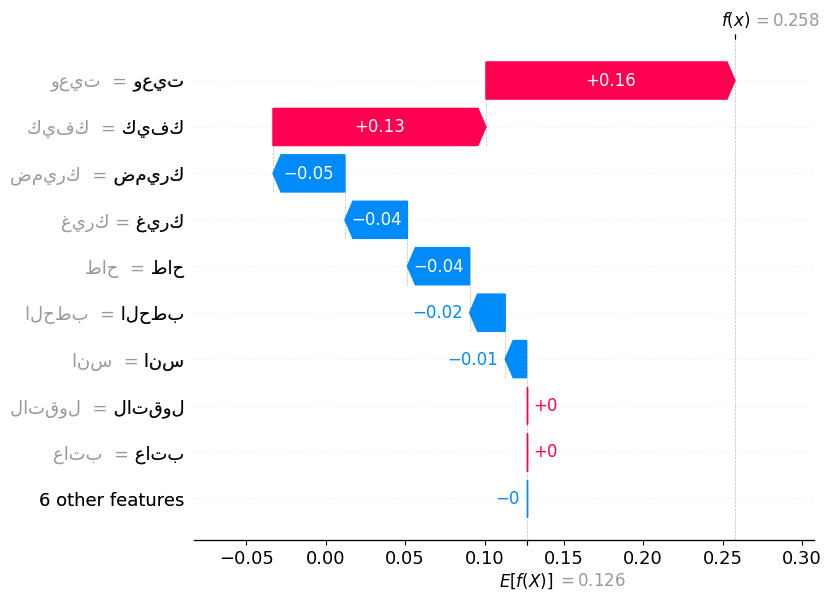

In [45]:
explain_example(incorrectly_classified[14])

## short statements

In [46]:
short_statements = []
for i in range(len(df_test)):
  if len(df_test["Light Stemming"].iloc[i]) <= 5:
    short_statements.append(i)

In [47]:
len(short_statements)

15

In [48]:
idx = 0
print(df_test["Light Stemming"].iloc[short_statements[idx]])
print(f"True Label: {label_to_class_dic[y_true[short_statements[idx]]]} - Predicted Label: {label_to_class_dic[y_pred[short_statements[idx]]]}")


True Label: none - Predicted Label: none


In [49]:
idx = 1
print(df_test["Light Stemming"].iloc[short_statements[idx]])
print(f"True Label: {label_to_class_dic[y_true[short_statements[idx]]]} - Predicted Label: {label_to_class_dic[y_pred[short_statements[idx]]]}")

ÿßŸÑŸÅŸÑ
True Label: joy - Predicted Label: joy


In [50]:
idx = 2
print(df_test["Light Stemming"].iloc[short_statements[idx]])
print(f"True Label: {label_to_class_dic[y_true[short_statements[idx]]]} - Predicted Label: {label_to_class_dic[y_pred[short_statements[idx]]]}")

ÿ≥ÿπŸäÿØŸá
True Label: joy - Predicted Label: joy


In [51]:
idx = 3
print(df_test["Light Stemming"].iloc[short_statements[idx]])
print(f"True Label: {label_to_class_dic[y_true[short_statements[idx]]]} - Predicted Label: {label_to_class_dic[y_pred[short_statements[idx]]]}")

ŸàŸÇŸÑÿ®Ÿä
True Label: sympathy - Predicted Label: love


In [52]:
idx = 4
print(df_test["Light Stemming"].iloc[short_statements[idx]])
print(f"True Label: {label_to_class_dic[y_true[short_statements[idx]]]} - Predicted Label: {label_to_class_dic[y_pred[short_statements[idx]]]}")

ÿπÿßŸäÿ¥
True Label: surprise - Predicted Label: sadness


In [53]:
idx = 5
print(df_test["Light Stemming"].iloc[short_statements[idx]])
print(f"True Label: {label_to_class_dic[y_true[short_statements[idx]]]} - Predicted Label: {label_to_class_dic[y_pred[short_statements[idx]]]}")

ÿßÿ≤ÿπŸÑ
True Label: surprise - Predicted Label: sadness


as we can see there are a lot of one word tweets and 15 tweets of length 5 or less, there's and even empty tweet after preprocessing.

## Mixed feelings

True Label joy - Predicted Label none
Explaining according to label none
ÿ¨ÿßŸäÿ≤ ÿ¨ÿØÿß ŸàŸÖŸÖŸÉŸÜ ÿ®ÿßŸÑÿπŸàÿßŸÖŸá ÿßŸÑÿ®ÿ∑Ÿá ŸÅŸä ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿßŸÑÿ¨ÿßŸäüòÇüòÇüòÇüòÇüòÇüòÇüòÇ


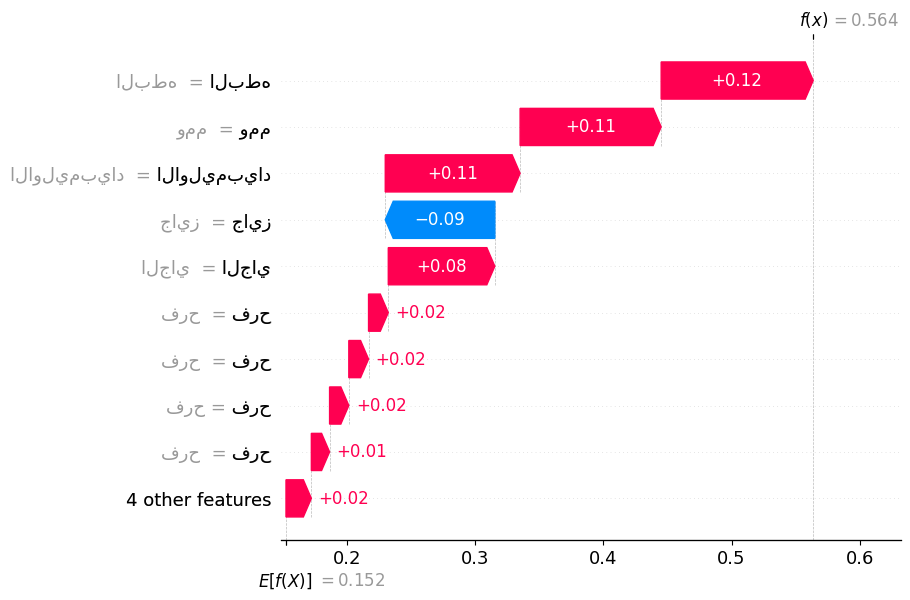

In [54]:
explain_example(incorrectly_classified[10])

here we have mixed feelings for that person that "you love" and the sadness from not having them.

True Label joy - Predicted Label love
Explaining according to label love
ÿµŸàÿ™ŸÉ ÿØŸá ÿßŸäŸá ÿßŸÑŸÑŸá ÿπŸÑŸäŸá ŸÖŸÑÿßŸäŸÉŸá ÿ®Ÿäÿ∫ŸÜŸàÿß ...


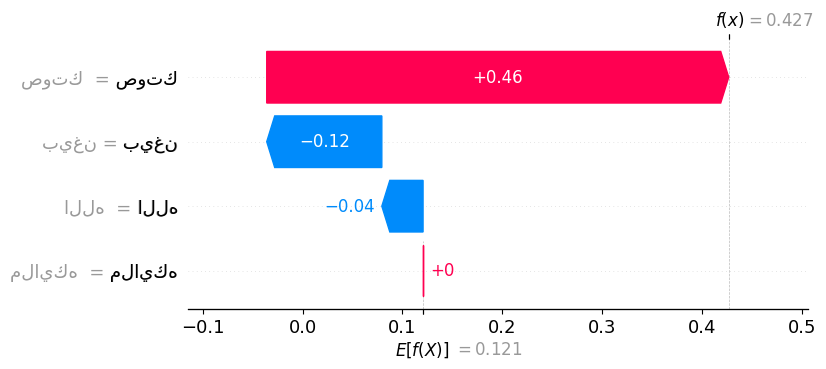

In [55]:
explain_example(incorrectly_classified[12])

here we have mixed emotions between joy and love, love for that beatiful sound and joy for hearing it, and it's hard to pick one.

True Label sympathy - Predicted Label joy
Explaining according to label joy
ÿßŸÑŸÑŸá Ÿäÿ≥ÿπÿØŸÉŸÖ. ŸàŸäŸÉŸàŸÜ ŸÖÿπŸÉŸÖ


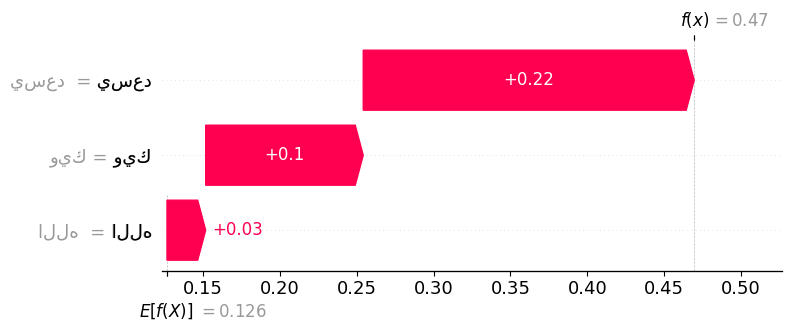

In [56]:
explain_example(incorrectly_classified[13])

## Is there a lack of sufficient training data for a particular label?

In [57]:
df_train['label'].value_counts()

0    1074
1    1019
2     891
3     885
4     850
7     842
5     755
6     729
Name: label, dtype: int64

class surprise has 300+ less examples than none, but is that enough to make a big difference?
however when you think about it in terms of ratio 300 is almost a third of number of examples of none.

### Observation: root stemming seems to break the words meaning and reduce accuracy below the no stemming, however light stemming seems to preserve word meaning and even improve the baseline accuracy

## Labels predicted the same across all models

### None

True Label none - Predicted Label none
Explaining according to label none
ŸÜŸÅÿ≥Ÿä ÿßÿ¥ŸàŸÅ ŸÇÿ∑ÿ±Ÿä ÿ¨ÿØ ÿ¨ÿØ ŸÖÿ¥ÿßÿ±ŸÉ ŸÅŸä ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ŸÜŸÅÿ≥ ÿßŸÑÿ¥ÿ¶ ŸäŸÜÿ∑ÿ®ŸÇ ÿπŸÑŸä ÿßŸÑŸÅÿ±ŸÜÿ≥ŸäŸäŸÜ


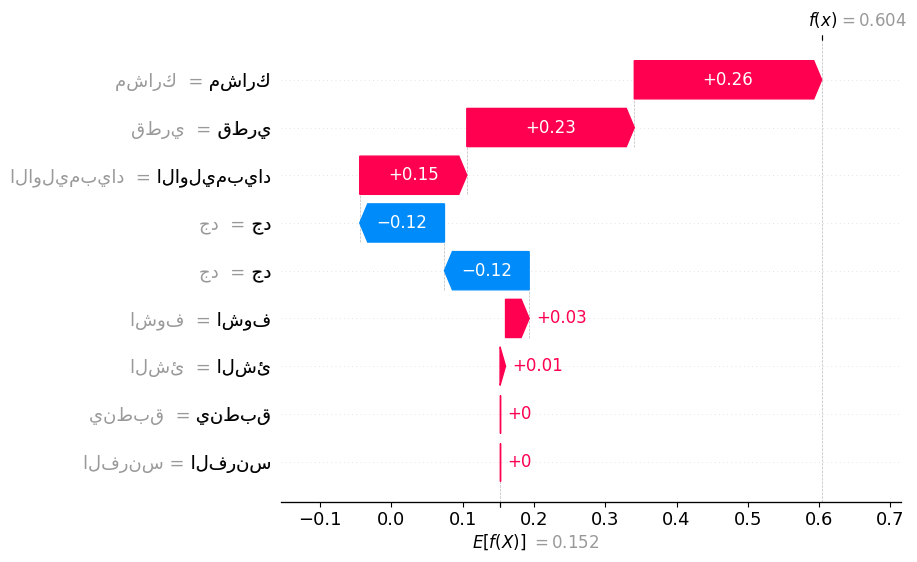

In [58]:
explain_example(3)

True Label joy - Predicted Label none
Explaining according to label none
ÿßŸÑÿßŸàŸÑŸäŸÖÿ®ŸäÿßÿØ ÿßŸÑÿ≥ŸÜŸá ÿØŸä ÿßŸÅÿ¥ÿÆ ŸÖŸÜ ÿ≥ŸäÿØŸÜŸä ÿßŸÑŸÑŸä ŸÉŸÜÿß ÿ®ŸÜÿ≤Ÿàÿ∫ ŸÖŸÜ ÿßŸÑŸÖÿØÿ±ÿ≥Ÿá ÿπŸÑÿ¥ÿßŸÜ ŸÜÿ™ŸÅÿ±ÿ¨ ÿπŸÑŸäŸáÿß üòÄ


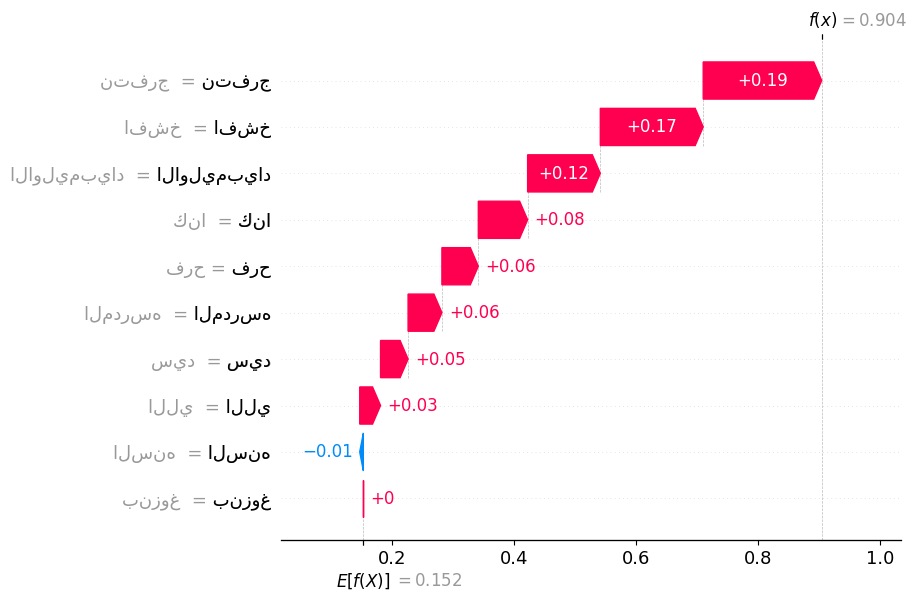

In [67]:
explain_example(2)

### Anger

True Label anger - Predicted Label anger
Explaining according to label anger
ÿßŸÑÿ≥ÿπŸàÿØŸäŸá ÿßŸÑÿ´ÿßŸÑÿ´Ÿá ŸÅŸä ÿßŸÑÿ≥ŸÖŸÜŸá ŸÖŸÅÿ±Ÿàÿ∂ ÿßŸÑÿßŸàŸÑŸä ÿ® ÿßŸÑÿ≥ŸÖŸÜŸá ÿπŸÑŸä ŸÉÿ´ÿ± ŸÖÿß Ÿäÿ≥ŸàŸàŸÜ ÿ™ŸÉŸÖŸäŸÖ ????????


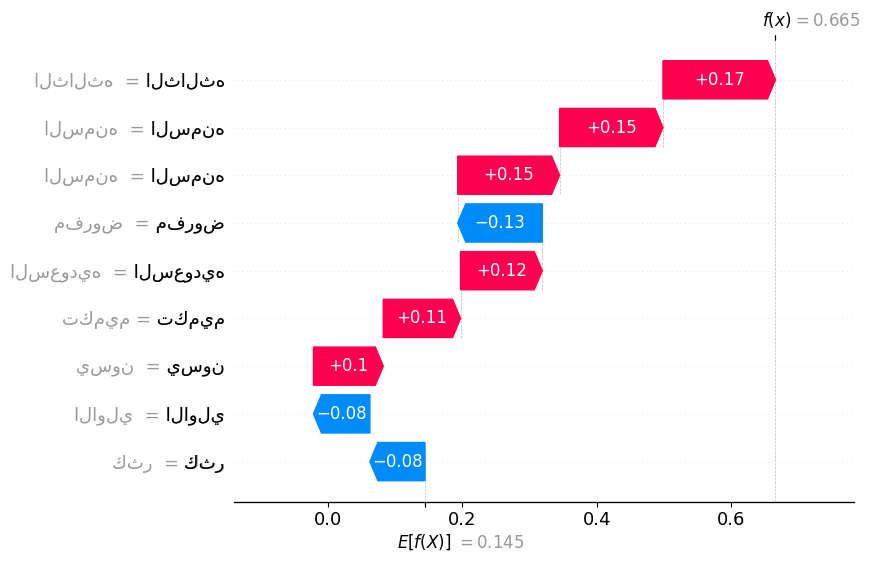

In [61]:
explain_example(13)

True Label sadness - Predicted Label anger
Explaining according to label anger
ÿ¨ŸÜŸàÿØ ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäŸàŸÜ Ÿäÿ±ŸÖŸàŸÜ ÿßŸàÿ≥ŸÖÿ™ŸáŸÖ ÿßŸÖÿßŸÖ ŸÖÿ®ŸÜŸä ÿßŸÑÿ≠ŸÉŸàŸÖŸá ŸÑÿß ŸäŸÖŸÉŸÜŸÜÿß ÿßŸÜ ŸÜÿ¨ŸÜŸä ÿßŸÑÿ≥ŸÑÿßŸÖ ŸàŸÜÿ≠ŸÜ ŸÜŸÇÿ™ŸÑ ŸÖÿØŸÜŸäŸäŸÜ ÿ®ÿ≠ÿ¨Ÿá  ÿØÿßÿπÿ¥ ŸàÿπŸÑŸä  ÿ®ÿ±Ÿäÿ∑ÿßŸÜŸäÿß ÿ®ÿßŸÑÿßŸÜÿ≥ÿ≠ÿßÿ® ŸÖŸÜ ÿßŸÑÿ™ÿ≠ÿßŸÑŸÅ ÿßŸÑÿØŸàŸÑŸä


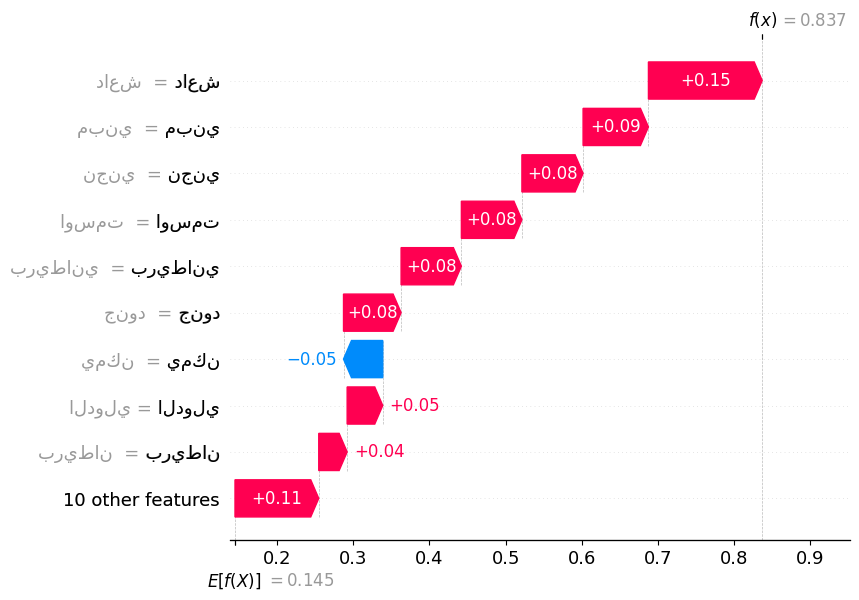

In [70]:
explain_example(429)

### Joy

True Label joy - Predicted Label joy
Explaining according to label joy
88  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá ŸÑÿß ÿ™ŸÑŸàŸÖŸÜŸä ÿ™ŸàŸä ÿµÿßÿ≠Ÿä ŸÖŸÜ ŸÅÿ±ÿ≠Ÿá ÿ∫Ÿäÿ®Ÿàÿ®Ÿá ÿßŸÑÿØŸàÿ±Ÿä  ????


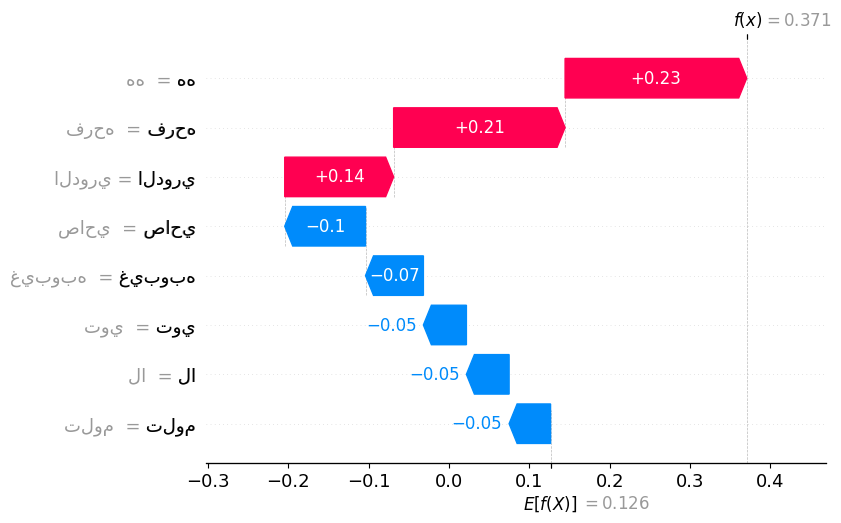

In [66]:
explain_example(65)

True Label love - Predicted Label joy
Explaining according to label joy
ÿßÿ≠ŸÑÿßŸÖ ÿßŸÑÿπŸÜÿ≤Ÿä ŸÅÿÆÿ± ÿßŸÑŸÉŸàŸäÿ™ ÿßŸÑŸÅ ÿßŸÑŸÅ ŸÖÿ®ÿ±ŸàŸàŸàŸàŸàŸÉ ÿ®ŸÜÿ™ ŸÇÿ®ŸäŸÑÿ™Ÿä Ÿàÿ®ŸÜÿ™ ÿØŸäÿ±ÿ™ŸäŸäŸäŸäŸä???????????????????? ŸÉŸÅŸà ÿπŸäÿßŸÑ ÿßŸÑÿØŸäÿ±Ÿá ŸÉŸÑ ŸäŸàŸÖ ÿßÿ≥ŸÖ ÿ±ÿßŸÅÿπ ÿßÿ≥ŸÖŸÜÿß ÿ®ÿ¥ÿßÿ±Ÿá ÿÆŸäÿ± ÿßŸÜ ÿ¥ÿßÿ° ÿßŸÑŸÑŸá


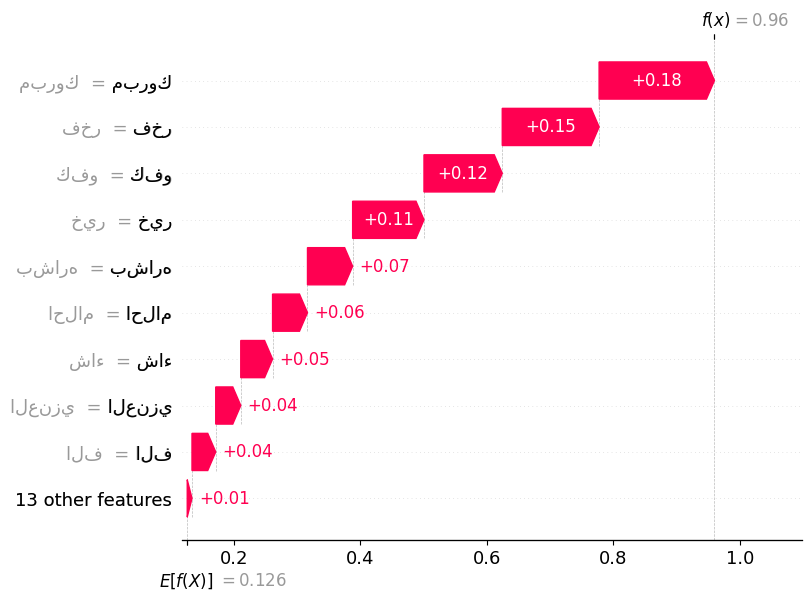

In [69]:
explain_example(203)

### Sadness

True Label sadness - Predicted Label sadness
Explaining according to label sadness
ÿπŸäÿ¥ ŸÑŸàÿ≠ÿØŸÉ ÿ≠ÿ™Ÿä ŸÑŸà Ÿáÿ™ŸÖŸàÿ™ ÿßÿ≠ÿ≥ŸÜ ŸÖŸÜ ÿßŸÜŸÉ ÿ™ŸÅÿ±ÿ∂ ŸÜŸÅÿ≥ŸÉ ÿπŸÑŸä ÿ≠ÿØ ŸÖÿ¥ ÿπŸäÿ≤ŸÉ


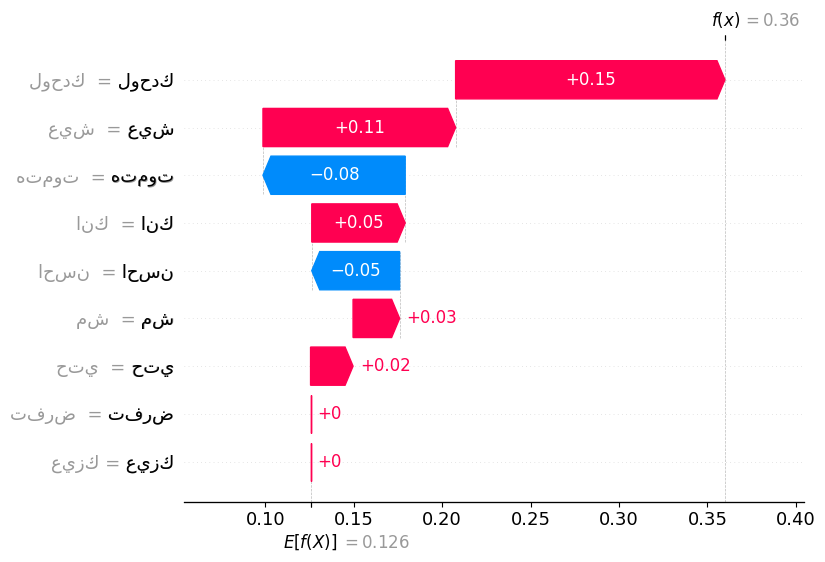

In [63]:
explain_example(27)

True Label anger - Predicted Label sadness
Explaining according to label sadness
ÿßÿ±ŸÖŸàŸáŸÖ ŸÅŸä ÿßÿπŸÖÿßŸÇ ÿßŸÑÿ®ÿ≠ÿßÿ± ÿ≠ÿ™Ÿä ÿ™ÿ¥ÿ™ÿ™ ÿßŸÑÿßŸÖŸàÿßÿ¨ ÿßÿ¥ŸÑÿßÿ¶ŸáŸÖ ..


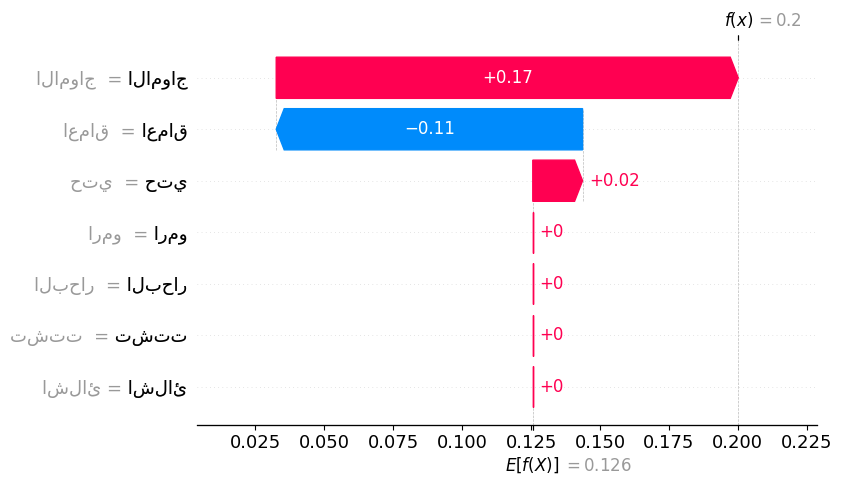

In [71]:
explain_example(60)

### Love

True Label love - Predicted Label love
Explaining according to label love
: ÿßŸÑŸÑŸáŸÖ ÿßÿ±ÿ≤ŸÇŸÜÿß ŸÉ Ÿà ŸÖŸÜ  Ÿäÿ≠ÿ®ŸÉ Ÿàÿ≥ÿπÿßÿØŸá ŸÅŸä ÿßŸÑÿØŸÜŸäÿß Ÿàÿ±ÿ∂ÿß ŸÅŸä ÿßŸÑÿßÿÆÿ±Ÿá ÿå ÿßŸÑŸÑŸáŸÖ ŸÑŸÜÿß ÿßÿ≠ÿ®Ÿá ŸàŸÇŸÑŸàÿ®ÿß ŸÖÿ≠ÿ®Ÿá ŸÜÿ±ŸäÿØŸáÿß ÿßŸÜ ÿ™ÿ¨ÿ™ŸÖÿπ ŸÅÿ¨ŸÖÿπŸáÿß ÿπŸÑŸä ÿ®ÿ±ŸÉŸá‚Ä¶


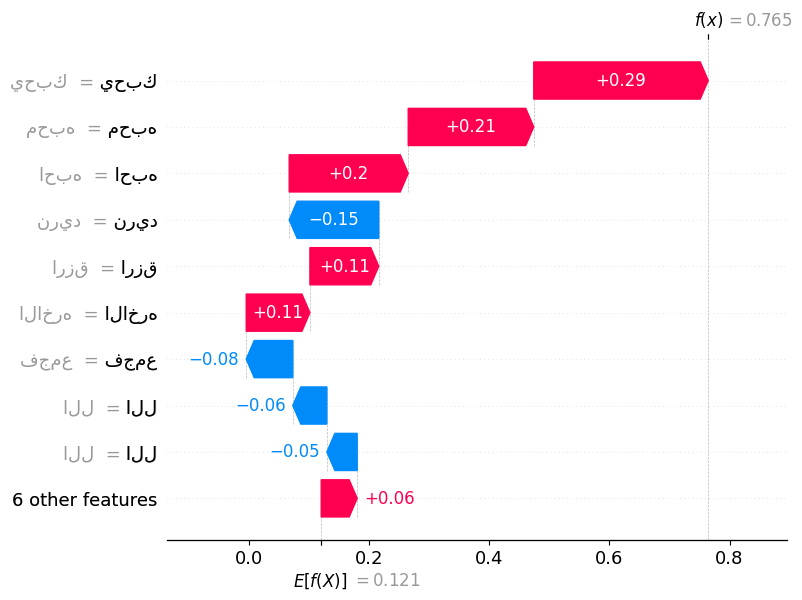

In [60]:
explain_example(9)

True Label joy - Predicted Label love
Explaining according to label love
ŸÑÿß ŸäŸàŸàŸàŸàŸàŸàŸàÿµŸÅ ????‚ù§  ÿßÿ≠ÿ≥ÿßÿ≥ ÿÆÿßŸÑÿØ ÿπÿ®ÿØÿßŸÑÿ±ÿ≠ŸÖŸÜ


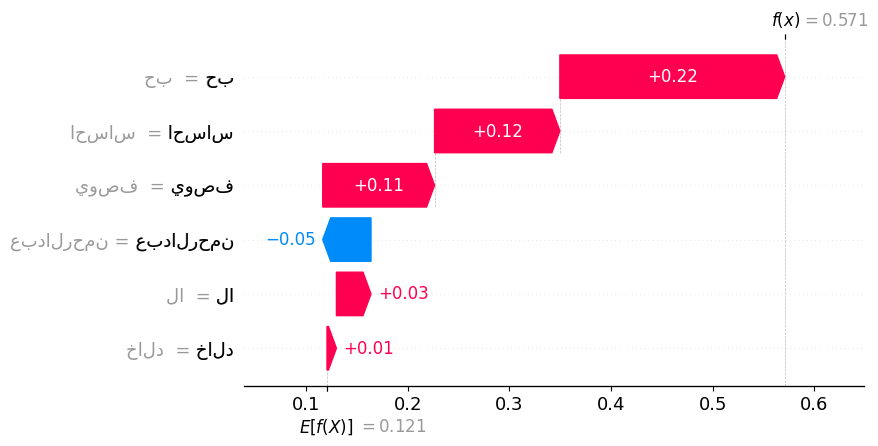

In [72]:
explain_example(263)

### Sympathy

True Label sympathy - Predicted Label sympathy
Explaining according to label sympathy
o:  ÿ™ÿ±ÿßÿ¨ŸÅ ÿßŸäÿØŸäŸÜŸä ŸÖŸÜ ÿßŸÑÿ®ÿ±ÿØ ŸàŸÇŸàŸÑ ÿßŸÑŸÑŸá ŸäŸÉŸàŸÜ ÿ®ÿπŸàŸÜ ÿßÿÆŸàŸÜŸÜÿß ÿ®  ÿßŸÑÿπÿ±ÿßŸÇ Ÿà Ÿà  ÿßŸÑŸäŸÖŸÜ ÿßŸÑŸÑŸáŸÖ ÿßŸÜ ÿßŸÑŸÉŸÑ ÿÆÿ∞ŸÑŸáŸÖ ŸÅÿßŸÜÿµÿ±ŸáŸÖ Ÿäÿßÿ±ÿ® üíîüôèüèª


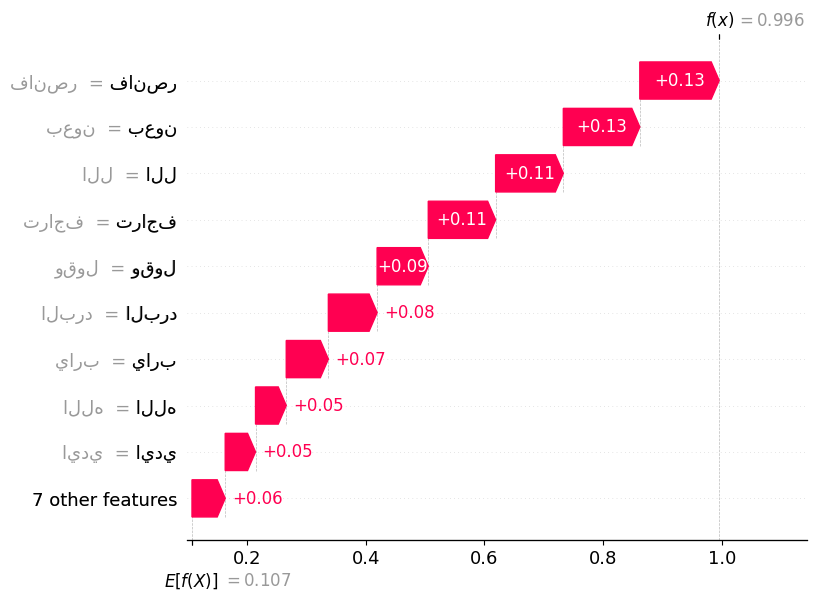

In [64]:
explain_example(32)

True Label love - Predicted Label sympathy
Explaining according to label sympathy
: ÿÆÿ∑ÿßŸÉŸÖ ÿßŸÑÿ≥Ÿàÿ° .. Ÿäÿß ÿßŸáŸÑ ÿßŸÑÿßŸÖÿßÿ±ÿßÿ™ ÿßŸÑÿ∫ÿßŸÑŸäŸá  ÿßŸÑŸÑŸá Ÿäÿ≠ŸÅÿ∏ŸÉŸÖ .. ŸÖŸÜ ŸÉŸÑ ŸÖŸÉÿ±ŸàŸá ..


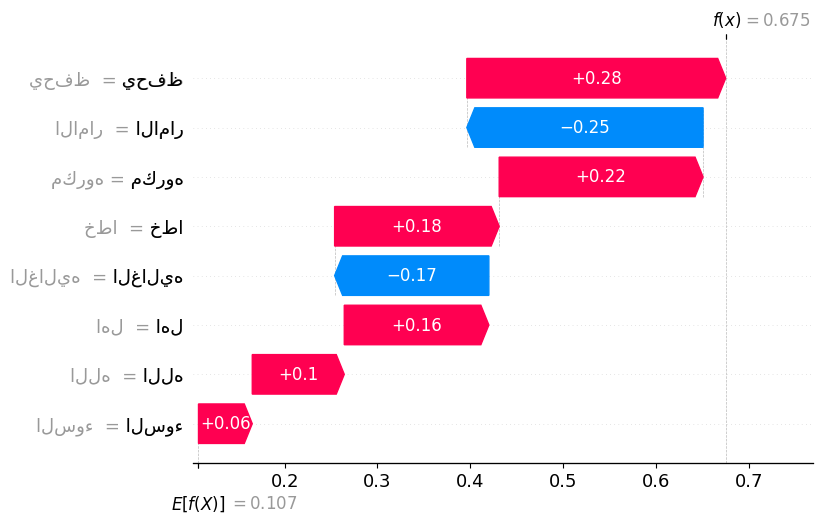

In [73]:
explain_example(172)

### Surprise

True Label surprise - Predicted Label surprise
Explaining according to label surprise
ŸÖÿ¥ ŸÖÿπŸÇŸàŸàŸàŸÑ .. ÿßŸáŸÜŸäŸÉ ÿπŸÑŸä Ÿáÿ∞Ÿä ÿßŸÑŸÖŸàŸáÿ®Ÿá .. ÿßÿ®ÿØÿßÿπ ŸäŸÅŸàŸÇ ÿßŸÑŸàÿµŸÅ


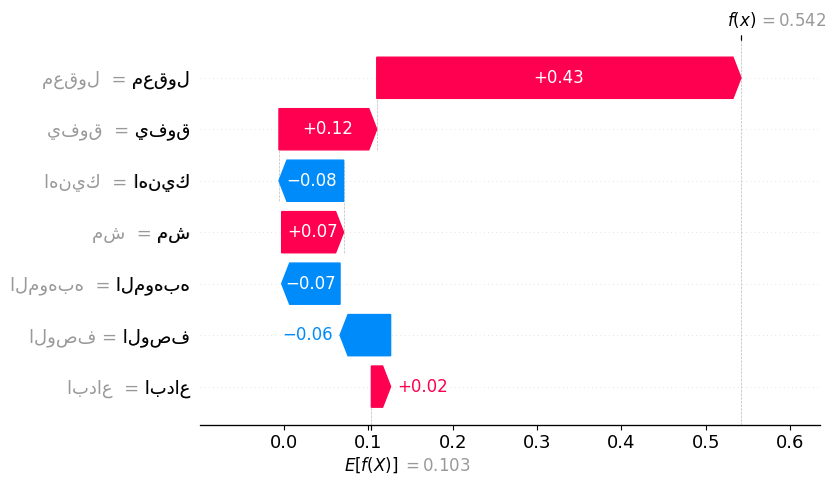

In [62]:
explain_example(17)

### Fear

True Label fear - Predicted Label fear
Explaining according to label fear
she3er: ÿ≥ŸÖÿπÿ™ ÿßŸÜ ÿßŸÑÿ≠ŸÜŸäŸÜ ŸäŸÇÿµÿ±Ÿë ÿßŸÑÿßÿπŸÖÿßÿ± ! ÿßŸÜÿß ÿÆÿßŸäŸÅ ÿ™ÿ∫Ÿäÿ® ÿßŸÉÿ´ÿ± Ÿà   ÿßÿ≠ÿ™ÿ∂ÿ±ŸÉ


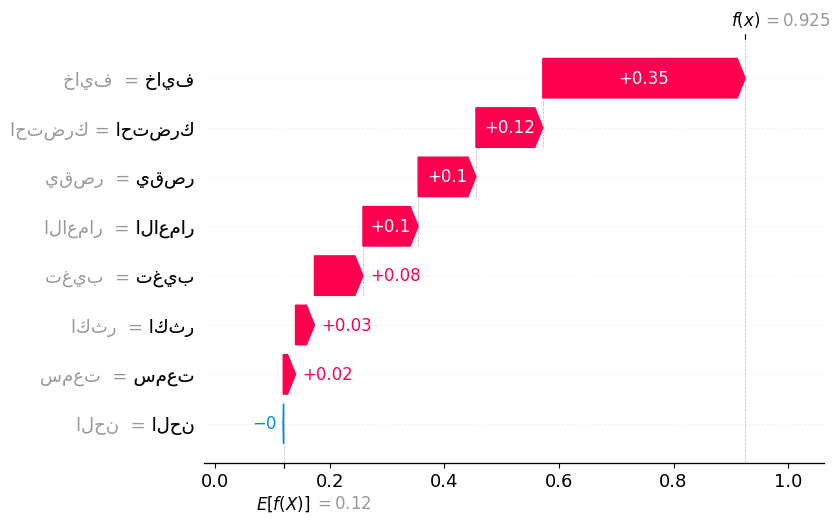

In [59]:
explain_example(4)

True Label love - Predicted Label fear
Explaining according to label fear
ŸÑÿß ÿ™ÿ∫Ÿäÿ® ÿßŸÉÿ´ÿ± ÿ≠ŸÄÿ®ŸÄŸäŸÄÿ®ŸÄŸä ÿÆÿßŸÅ ÿßŸÖŸàÿ™ ŸÖŸÜ ÿßŸÑŸÄÿ≠ŸÄŸÜŸÄŸäŸÄŸÜ  Love


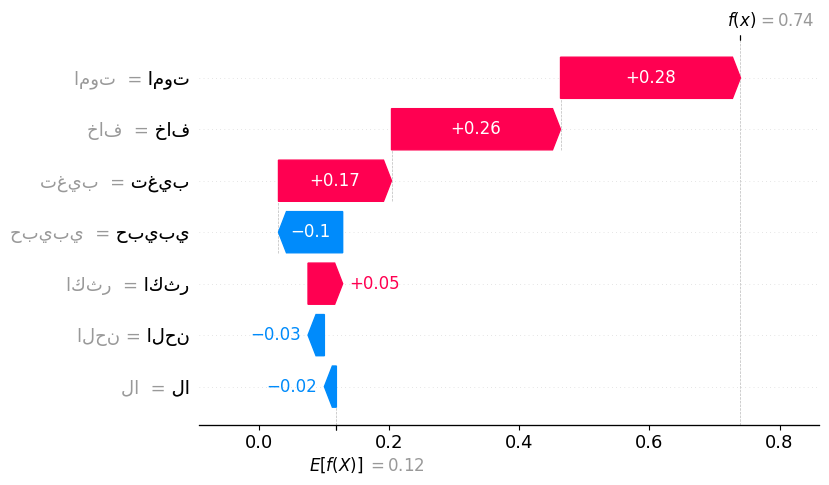

In [74]:
explain_example(768)